In [0]:
import urllib
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import numpy as np

In [0]:
max_results_per_city = 1000

city_set = ['Charlottesville', 'Richmond', 'Washington+DC', 'New+York']

columns = ['Company', 'Title', 'Location', 'Salary', 'Rating', 'Reviews', 'Summary']

indeed_df = pd.DataFrame(columns = columns)

In [0]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"

In [0]:
for city in city_set:
    for start in range(0, max_results_per_city, 10):
        url = url_template.format(city, start)
        html = requests.get(url)
        soup = BeautifulSoup(html.content, 'html.parser', from_encoding="utf-8")
        for each in soup.find_all(class_= "result" ):
            try: 
                title = each.find(class_='jobtitle').text.replace('\n', '')
            except:
                title = np.NaN
            try:
                location = each.find(class_='location').text.replace('\n', '')
            except:
                location = np.NaN
            try: 
                company = each.find(class_='company').text.replace('\n', '')
            except:
                company = np.NaN
            try:
                reviews = each.find(class_='slNoUnderline').text.replace('\n', '')
            except:
                reviews = np.NaN
            try:
                salary = each.find(class_='salary').text.replace('\n', '')
            except:
                salary = np.NaN
            try:
                synopsis = each.find(class_='summary').text.replace('\n', '')
            except:
                synopsis = np.NaN
            try:
                ratings = str(each.find(class_='rating'))
                ratings = (float(ratings[34:38]) / 10.0) - 1
            except:
                ratings = np.NaN
            indeed_df = indeed_df.append({'Company':company, 'Title':title, 'Location':location, 'Salary':salary, 'Rating':ratings, 'Reviews':reviews, 'Summary':synopsis}, ignore_index=True)

In [0]:
indeed_df = indeed_df.dropna(subset = ['Rating'])
indeed_df = indeed_df.dropna(subset = ['Salary'])

In [0]:
char = "Charlottesville, VA"
rich = "Richmond, VA"
dc = "Washington, DC"
ny = "NY"
md = "MD"
for i in range(len(indeed_df.Location)):
    if(indeed_df.iloc[i, 2].find(char) != -1):
        indeed_df.iloc[i, 2] = char
    elif(indeed_df.iloc[i, 2].find(rich) != -1):
        indeed_df.iloc[i, 2] = rich
    elif(indeed_df.iloc[i, 2].find(dc) != -1):
        indeed_df.iloc[i, 2] = dc
    elif(indeed_df.iloc[i, 2].find(ny) != -1):
        indeed_df.iloc[i, 2] = "New York"
    elif(indeed_df.iloc[i, 2].find(md) != -1):
        indeed_df.iloc[i, 2] = "Maryland"
    else:
        indeed_df.iloc[i, 2] = "Other"

In [0]:
indeed_df.Rating = pd.to_numeric(indeed_df.Rating)

In [0]:
hor_bar = pd.DataFrame(indeed_df.groupby('Location')['Rating'].mean())

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

py.sign_in(username='abhinaydomm', api_key='VNVRv2SmOnOaK6bVAeY9')

x = hor_bar.Rating
sortedX = sorted(x)

data = [go.Bar(x = sortedX, y = ['Charlottesville', 'Maryland' , 'New York', 'Other', 'Richmond', 'DC'], orientation = 'h')]

#layout = go.Layout(yaxis = dict(categoryorder="category ascending", type = "category"))

fig = go.Figure(data=data)
py.iplot(fig, filename='automargin')

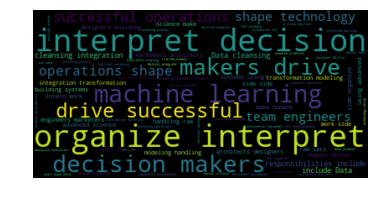

In [0]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text = " ".join(desc for desc in indeed_df.Summary)
text = text.replace("Data Scientist", "")
text = text.replace("data scientist", "")
text = text.replace("CIA", "")
text = text.replace("will", "")
text = text.replace("data", "")
text = text.replace("across multiple", "")
text = text.replace("inform US", "")
 
# Create the wordcloud object
wordcloud = WordCloud().generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [0]:
indeed_df.Reviews = indeed_df.Reviews.str[:-8]

In [0]:
indeed_df.Reviews = indeed_df.Reviews.str.replace(',', '')

In [0]:
temp = indeed_df

In [0]:
temp.head()

,Company,Title,Location,Salary,Rating,Reviews,Summary
2,ASSURANCE Independent Agents,Life Insurance Agent - No 12 month...,Other,"$50,000 - $125,000 a year",2.24,69,"Our team of engineers, data scient..."
5,Virginia Department of Transportation,Pavement Activity Coordinator,"Charlottesville, VA","$44,355 - $65,000 a year",3.44,226,This position will serve as the pr...
8,Virginia Dept of Transportation,Pavement Activity Coordinator,"Charlottesville, VA","$44,355 - $65,000 a year",3.44,226,This position will serve as the pr...
18,ASSURANCE Independent Agents,Life Insurance Agent - No 12 month...,Other,"$50,000 - $125,000 a year",2.24,69,"Our team of engineers, data scient..."
28,Virginia Department of Transportation,Pavement Activity Coordinator,"Charlottesville, VA","$44,355 - $65,000 a year",3.44,226,This position will serve as the pr...


In [0]:
temp['Salary'] = temp.Salary.str.replace(r"[a-zA-Z]",'')

In [0]:
temp['Salary'].str.strip()

2               $50,000 - $125,000
5                $44,355 - $65,000
8                $44,355 - $65,000
18              $50,000 - $125,000
28               $44,355 - $65,000
37               $44,355 - $65,000
46              $50,000 - $125,000
69               $44,355 - $65,000
74              $50,000 - $125,000
90              $50,000 - $125,000
106             $50,000 - $125,000
121             $50,000 - $125,000
128              $44,355 - $65,000
137             $50,000 - $125,000
151             $50,000 - $125,000
157              $44,355 - $65,000
166             $50,000 - $125,000
172              $44,355 - $65,000
180       $41,000 - $56,000   ( .)
181             $50,000 - $125,000
182      $78,000 - $115,000   ( .)
187              $44,355 - $65,000
195       $41,000 - $56,000   ( .)
196             $50,000 - $125,000
197      $78,000 - $115,000   ( .)
212             $50,000 - $125,000
227             $50,000 - $125,000
234              $44,355 - $65,000
242       $41,000 - 

In [0]:
temp['Salary'] = temp['Salary'].str.replace('$', '')
temp['Salary'] = temp['Salary'].str.replace('(', '')
temp['Salary'] = temp['Salary'].str.replace(')', '')
temp['Salary'] = temp['Salary'].str.replace('.', '')
temp['Salary'] = temp['Salary'].str.replace(',', '')
temp['Salary'] = temp['Salary'].str.strip()

In [0]:
temp.head()

,Company,Title,Location,Salary,Rating,Reviews,Summary
2,ASSURANCE Independent Agents,Life Insurance Agent - No 12 month...,Other,50000 - 125000,2.24,69,"Our team of engineers, data scient..."
5,Virginia Department of Transportation,Pavement Activity Coordinator,"Charlottesville, VA",44355 - 65000,3.44,226,This position will serve as the pr...
8,Virginia Dept of Transportation,Pavement Activity Coordinator,"Charlottesville, VA",44355 - 65000,3.44,226,This position will serve as the pr...
18,ASSURANCE Independent Agents,Life Insurance Agent - No 12 month...,Other,50000 - 125000,2.24,69,"Our team of engineers, data scient..."
28,Virginia Department of Transportation,Pavement Activity Coordinator,"Charlottesville, VA",44355 - 65000,3.44,226,This position will serve as the pr...


In [0]:
temp = indeed_df.copy()

In [0]:
temp.shape

(1109, 7)

In [0]:
temp = temp[temp.Salary.str.contains("-")]

In [0]:
temp['Salary'] = temp['Salary'].str.replace(' - ', '+')

In [0]:
for i in range(len(temp['Salary'])):
    temp.iloc[i, 3] = eval(temp.iloc[i, 3])
    temp.iloc[i, 3] = temp.iloc[i, 3] / 2

In [0]:
temp.Reviews = pd.to_numeric(temp.Reviews)

In [0]:
temp = temp[temp.Salary.astype(str).str.len() > 4]

In [0]:
temp.Salary = pd.to_numeric(temp.Salary)

In [0]:
temp.Salary.dtypes

dtype('float64')

In [0]:
top = temp[temp.Rating > 4.0]

In [0]:
top_companies = top.Company.unique()

In [0]:
top_companies

array(['        The Rector & Visitors of the University of Virgini...',
       '        CCRi', '        Virginia Department of General Services',
       '        Capital One', '        New Virginia Majority',
       '        Virginia Commonwealth University',
       '        Virginia state University',
       '        Anistar Technologies', '        National Security Agency',
       '        Central Intelligence Agency',
       '        US Department of Energy', '        Deloitte',
       '        United States District Court',
       '        Axiologic Solutions', '        Northrop Grumman',
       '        BigBear, Inc.',
       "        Prince George's Community College",
       '        US Department of Commerce',
       '        Centers for Disease Control and Prevention',
       '        Food and Drug Administration',
       '        U.S. Federal Government', '        Accenture',
       '        George Washington University',
       '        Johns Hopkins Applied Physics Laborato

In [0]:
hor_bar_sal = pd.DataFrame(temp.groupby(top['Company'])['Salary'].mean())

In [0]:
x = hor_bar_sal.Salary
sortedX = sorted(x)

data = [go.Bar(x = sortedX, y = top['Company'].unique(), orientation = 'h')]

layout = go.Layout(
    autosize=True,
    yaxis=go.layout.YAxis(
        automargin=True,
    ),
    xaxis=go.layout.XAxis(
        title = 'Salary',
        automargin=True,
    ),
    paper_bgcolor='#7f7f7f',
    plot_bgcolor='#c7c7c7'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='automargin')

In [0]:
temp['Location Metric'] = temp['Location']

In [0]:
for i in range(len(temp['Location Metric'])):
    if temp.iloc[i, 8] == "Other":
        temp.iloc[i, 8] = "65"
    elif temp.iloc[i, 8] == "Charlottesville, VA":
        temp.iloc[i, 8] = "85"
    elif temp.iloc[i, 8] == "New York":
        temp.iloc[i, 8] = "75"
    elif temp.iloc[i, 8] == "Richmond, VA":
        temp.iloc[i, 8] = "90"
    elif temp.iloc[i, 8] == "Washington, DC":
        temp.iloc[i, 8] = "95"
    elif temp.iloc[i, 8] == "Maryland":
        temp.iloc[i, 8] = "90"

In [0]:
temp['Salary Metric'] = temp['Salary']

In [0]:
print(np.max(temp['Salary Metric']))

190061.5


In [0]:
print(np.min(temp['Salary Metric']))

1630.0


In [0]:
for i in range(len(temp['Salary Metric'])):
    if temp.iloc[i, 9] < 36452.6:
        temp.iloc[i, 9] = 55
    elif temp.iloc[i, 9] < 72905.2 and temp.iloc[i, 9] > 36452.6:
        temp.iloc[i, 9] = 65
    elif temp.iloc[i, 9] < 109357.8 and temp.iloc[i, 9] > 72905.2:
        temp.iloc[i, 9] = 75
    elif temp.iloc[i, 9] < 145810.4 and temp.iloc[i, 9] > 109357.8:
        temp.iloc[i, 9] = 85
    elif temp.iloc[i, 9] < 180500 and temp.iloc[i, 9] > 145810.4:
        temp.iloc[i, 9] = 95

In [0]:
temp['Rating Metric'] = temp['Rating']

In [0]:
for i in range(len(temp['Rating Metric'])):
    if temp.iloc[i, 10] < 1:
        temp.iloc[i, 10] = 55
    elif temp.iloc[i, 10] < 2 and temp.iloc[i, 9] > 1:
        temp.iloc[i, 10] = 65
    elif temp.iloc[i, 10] < 3 and temp.iloc[i, 9] > 2:
        temp.iloc[i, 10] = 75
    elif temp.iloc[i, 10] < 4 and temp.iloc[i, 9] > 3:
        temp.iloc[i, 10] = 85
    elif temp.iloc[i, 10] < 5 and temp.iloc[i, 9] > 4:
        temp.iloc[i, 10] = 95

In [0]:
temp['Reviews Metric'] = temp['Reviews']

In [0]:
print(np.min(temp['Reviews Metric']))

2


In [0]:
print(np.max(temp['Reviews Metric']))

25593


In [0]:
for i in range(len(temp['Reviews'])):
    if temp.iloc[i, 11] < 13723:
        temp.iloc[i, 11] = 70
    elif temp.iloc[i, 11] < 27446 and temp.iloc[i, 9] > 13723:
        temp.iloc[i, 11] = 75
    elif temp.iloc[i, 11] < 41169 and temp.iloc[i, 9] > 27446:
        temp.iloc[i, 11] = 85
    elif temp.iloc[i, 11] < 54892 and temp.iloc[i, 9] > 41169:
        temp.iloc[i, 11] = 90
    elif temp.iloc[i, 11] < 68612 and temp.iloc[i, 9] > 54892:
        temp.iloc[i, 11] = 95

In [0]:
temp.head()

,Company,Title,Location,Salary,Rating,Reviews,Summary,Company Metric,Location Metric,Salary Metric,Rating Metric,Reviews Metric
2,ASSURANCE Independent Agents,Life Insurance Agent - No 12 month...,Other,87500.0,2.24,69,"Our team of engineers, data scient...",566.123188,65,75.0,75.0,70
5,Virginia Department of Transportation,Pavement Activity Coordinator,"Charlottesville, VA",54677.5,3.44,226,This position will serve as the pr...,70.330186,85,65.0,85.0,70
8,Virginia Dept of Transportation,Pavement Activity Coordinator,"Charlottesville, VA",54677.5,3.44,226,This position will serve as the pr...,70.330186,85,65.0,85.0,70
18,ASSURANCE Independent Agents,Life Insurance Agent - No 12 month...,Other,87500.0,2.24,69,"Our team of engineers, data scient...",566.123188,65,75.0,75.0,70
28,Virginia Department of Transportation,Pavement Activity Coordinator,"Charlottesville, VA",54677.5,3.44,226,This position will serve as the pr...,70.330186,85,65.0,85.0,70


In [0]:
temp['Location Metric'] = pd.to_numeric(temp['Location Metric'])

In [0]:
temp['Company Metric'] = (temp['Location Metric'] + temp['Salary Metric'] + temp['Rating Metric'])/ 3

In [0]:
temp

,Company,Title,Location,Salary,Rating,Reviews,Summary,Company Metric,Location Metric,Salary Metric,Rating Metric,Reviews Metric
2,ASSURANCE Independent Agents,Life Insurance Agent - No 12 month...,Other,87500.0,2.24,69,"Our team of engineers, data scient...",71.666667,65,75.0,75.0,70
5,Virginia Department of Transportation,Pavement Activity Coordinator,"Charlottesville, VA",54677.5,3.44,226,This position will serve as the pr...,78.333333,85,65.0,85.0,70
8,Virginia Dept of Transportation,Pavement Activity Coordinator,"Charlottesville, VA",54677.5,3.44,226,This position will serve as the pr...,78.333333,85,65.0,85.0,70
18,ASSURANCE Independent Agents,Life Insurance Agent - No 12 month...,Other,87500.0,2.24,69,"Our team of engineers, data scient...",71.666667,65,75.0,75.0,70
28,Virginia Department of Transportation,Pavement Activity Coordinator,"Charlottesville, VA",54677.5,3.44,226,This position will serve as the pr...,78.333333,85,65.0,85.0,70
37,Virginia Dept of Transportation,Pavement Activity Coordinator,"Charlottesville, VA",54677.5,3.44,226,This position will serve as the pr...,78.333333,85,65.0,85.0,70
46,ASSURANCE Independent Agents,Life Insurance Agent - No 12 month...,Other,87500.0,2.24,69,"Our team of engineers, data scient...",71.666667,65,75.0,75.0,70
69,Virginia Dept of Transportation,Pavement Activity Coordinator,"Charlottesville, VA",54677.5,3.44,226,This position will serve as the pr...,78.333333,85,65.0,85.0,70
74,ASSURANCE Independent Agents,Life Insurance Agent - No 12 month...,Other,87500.0,2.24,69,"Our team of engineers, data scient...",71.666667,65,75.0,75.0,70
90,ASSURANCE Independent Agents,Life Insurance Agent - No 12 month...,Other,87500.0,2.24,69,"Our team of engineers, data scient...",71.666667,65,75.0,75.0,70


In [0]:
top_companies = temp[temp['Company Metric'] >= 80]

In [0]:
top_companies

,Company,Title,Location,Salary,Rating,Reviews,Summary,Company Metric,Location Metric,Salary Metric,Rating Metric,Reviews Metric
180,The Rector & Visitors of the Universit...,Postdoctoral Research Associate,"Charlottesville, VA",48500.0,4.16,255,The work is done using data from h...,81.666667,85,65.0,95.0,70
195,The Rector & Visitors of the Universit...,Postdoctoral Research Associate,"Charlottesville, VA",48500.0,4.16,255,The work is done using data from h...,81.666667,85,65.0,95.0,70
242,The Rector & Visitors of the Universit...,Postdoctoral Research Associate,"Charlottesville, VA",48500.0,4.16,255,The work is done using data from h...,81.666667,85,65.0,95.0,70
318,Pythian,Cloud Solutions Architect,Other,175000.0,3.08,12,Prior experience working as/with M...,81.666667,65,95.0,85.0,70
372,EIS,Data Science Software Developer,"Charlottesville, VA",142500.0,3.32,38,"Data pipelines, architectures and data sets. (...",85.000000,85,85.0,85.0,70
375,The Rector & Visitors of the Universit...,Postdoctoral Research Associate,"Charlottesville, VA",48500.0,4.16,255,The work is done using data from h...,81.666667,85,65.0,95.0,70
406,"Signature Science, LLC",Software Engineer/Programmer,"Charlottesville, VA",118500.0,2.24,17,Knowledge of fundamentals of Chemi...,81.666667,85,85.0,75.0,70
408,The Rector & Visitors of the Universit...,Postdoctoral Research Associate,"Charlottesville, VA",48500.0,4.16,255,The work is done using data from h...,81.666667,85,65.0,95.0,70
420,"Signature Science, LLC",Software Engineer/Programmer,"Charlottesville, VA",118500.0,2.24,17,Knowledge of fundamentals of Chemi...,81.666667,85,85.0,75.0,70
422,EIS,Data Science Software Developer,"Charlottesville, VA",142500.0,3.32,38,"Data pipelines, architectures and data sets. (...",85.000000,85,85.0,85.0,70


In [0]:
top_companies.to_csv('Data Science Jobs.csv', index=False)